In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir('../input/'))

['data.csv']


In [2]:
# reading the data

data = pd.read_csv('../input/data.csv')
data.shape

(30697, 28)

In [3]:
data.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [4]:
data.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [5]:
data.isnull().sum()

Unnamed: 0                   0
match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5862
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
team_id                      0
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [6]:
# filling the missing values

data['match_event_id'].fillna(data['match_event_id'].mean(), inplace = True)
data['location_x'].fillna(data['location_x'].mean(), inplace = True)
data['location_y'].fillna(data['location_y'].mean(), inplace = True)
data['remaining_min'].fillna(data['remaining_min'].mean(), inplace = True)
data['power_of_shot'].fillna(data['power_of_shot'].mean(), inplace = True)
data['knockout_match'].fillna(data['knockout_match'].mean(), inplace = True)
data['game_season'].fillna(data['game_season'].mode()[0], inplace = True)
data['remaining_sec'].fillna(data['remaining_sec'].mean(), inplace = True)
data['distance_of_shot'].fillna(data['distance_of_shot'].mean(), inplace = True)
data['area_of_shot'].fillna(data['area_of_shot'].mode()[0], inplace = True)
data['shot_basics'].fillna(data['shot_basics'].mode()[0], inplace = True)
data['range_of_shot'].fillna(data['range_of_shot'].mode()[0], inplace = True)
data['team_name'].fillna(data['team_name'].mode()[0], inplace = True)
data['date_of_game'].fillna(data['date_of_game'].mode()[0], inplace = True)
data['home/away'].fillna(data['home/away'].mode()[0], inplace = True)
data['shot_id_number'].interpolate(method = 'linear', inplace = True)
data['type_of_shot'].fillna(data['type_of_shot'].mode()[0], inplace = True)
data['type_of_combined_shot'].fillna(data['type_of_combined_shot'].mode()[0], inplace = True)
data['remaining_min.1'].fillna(data['remaining_min.1'].mean(), inplace = True)
data['power_of_shot.1'].fillna(data['power_of_shot.1'].mean(), inplace = True)
data['knockout_match.1'].fillna(data['knockout_match.1'].mean(), inplace = True)
data['remaining_sec.1'].fillna(data['remaining_sec.1'].mean(), inplace = True)
data['distance_of_shot.1'].fillna(data['distance_of_shot.1'].mean(), inplace = True)
data['lat/lng'].fillna(data['lat/lng'].mode()[0], inplace = True)

data.isnull().sum()

Unnamed: 0                  0
match_event_id              0
location_x                  0
location_y                  0
remaining_min               0
power_of_shot               0
knockout_match              0
game_season                 0
remaining_sec               0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot               0
team_name                   0
date_of_game                0
home/away                   0
shot_id_number              0
lat/lng                     0
type_of_shot                0
type_of_combined_shot       0
match_id                    0
team_id                     0
remaining_min.1             0
power_of_shot.1             0
knockout_match.1            0
remaining_sec.1             0
distance_of_shot.1          0
dtype: int64

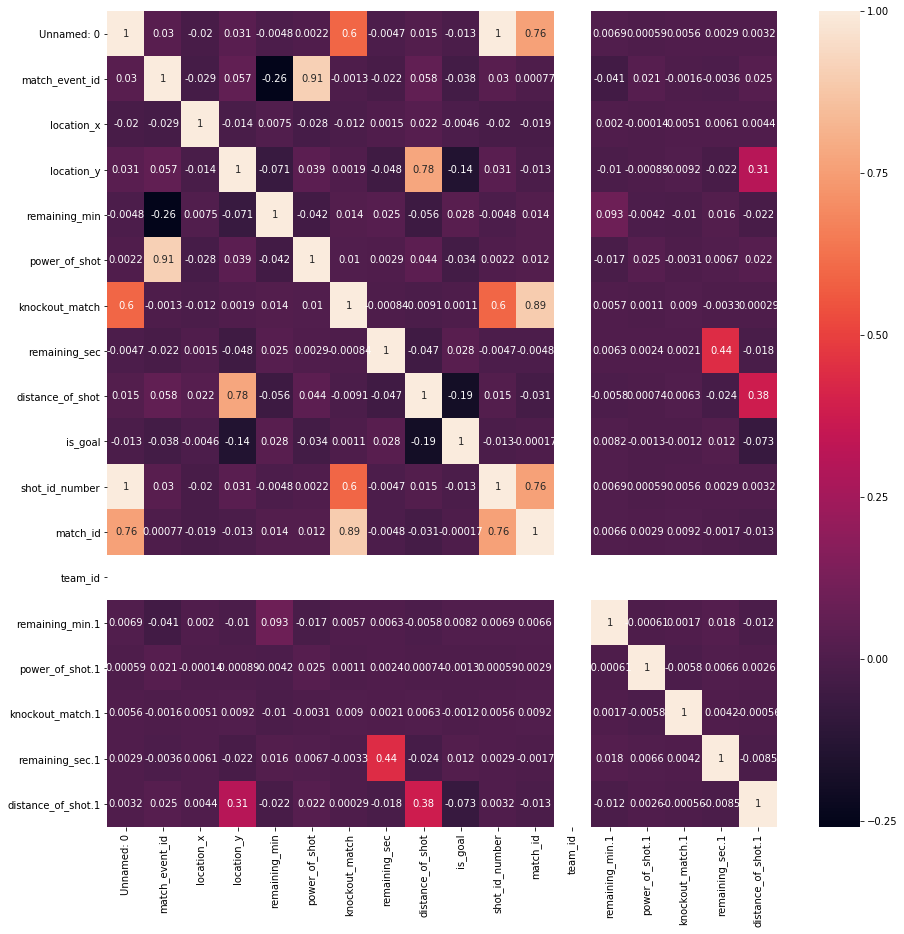

In [7]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.heatmap(data.corr(), annot = True)
plt.show()

In [8]:
# let's delete some unnecassary columns

data = data.drop(['Unnamed: 0', 'team_id', 'match_id','match_event_id', 'home/away'], axis = 1)
data.columns

Index(['location_x', 'location_y', 'remaining_min', 'power_of_shot',
       'knockout_match', 'game_season', 'remaining_sec', 'distance_of_shot',
       'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot', 'team_name',
       'date_of_game', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [9]:
data[['is_goal', 'type_of_combined_shot']].groupby(['type_of_combined_shot']).agg(['mean'])

,is_goal
,mean
type_of_combined_shot,
shot - 0,0.737705
shot - 1,0.927660
shot - 2,0.560606
shot - 3,0.422079
shot - 4,0.566463
shot - 5,0.347222


In [10]:
# target encoding for combined shot

data['type_of_combined_shot'].replace(('shot - 0', 'shot - 2', 'shot - 1', 'shot - 3',
                                      'shot - 4', 'shot - 5'), (0.73, 0.92, 0.56, 0.42, 0.56, 0.34), inplace = True)

data['type_of_combined_shot'].value_counts()

0.42    27102
0.56     3345
0.34       90
0.92       82
0.73       78
Name: type_of_combined_shot, dtype: int64

In [11]:
data[['is_goal', 'type_of_shot']].groupby(['type_of_shot']).agg(['mean'])

,is_goal
,mean
type_of_shot,
shot - 0,0.431579
shot - 1,0.502924
shot - 10,0.405882
shot - 11,0.387387
shot - 12,0.667808
shot - 13,0.280000
shot - 14,0.313559
shot - 15,0.527076


In [12]:
# target encoding for type of shot

data['type_of_shot'].replace(('shot - 0', 'shot - 1','shot - 10', 'shot - 11', 'shot - 12', 'shot - 13','shot - 14',
                              'shot - 15', 'shot - 16', 'shot - 17','shot - 18','shot - 19','shot - 2', 'shot - 20',
                             'shot - 21', 'shot - 22', 'shot - 23','shot - 24', 'shot - 25', 'shot - 26','shot - 27', 
                              'shot - 28', 'shot - 29','shot - 3','shot - 30', 'shot - 31', 'shot - 32','shot - 33', 'shot - 34',
                              'shot - 35','shot - 36','shot - 37','shot - 38', 'shot - 39','shot - 4', 'shot - 40','shot - 41', 'shot - 42',
                              'shot - 43', 'shot - 44', 'shot - 45','shot - 46','shot - 47','shot - 48', 'shot - 49','shot - 5',
                              'shot - 50','shot - 51','shot - 52','shot - 53', 'shot - 54', 'shot - 55', 'shot - 56', 'shot - 6','shot - 7','shot - 8',
                             'shot - 9'), (0.43, 0.5, 0.4, 0.38, 0.66, 0.28, 0.31, 0.52, 0.43, 0.57, 0.41, 0.42, 0.33, 0.34,
                                          0.39, 0.34,0.30, 0.46, 0.26, 0.42, 0.42, 0.30, 0.35, 0.37, 0.27, 0.46, 0.69, 0.36,
                                          0.27, 0.36, 0.31, 0.29, 0.51, 0.44, 0.69, 0.35, 0.34, 0.31, 0.49, 0.67, 0.31, 
                                          0.50, 0.32, 0.41, 0.31, 0.34, 0.26, 0.25, 0.57, 0.32, 0.43, 0.41, 0.57, 0.31, 0.28,
                                          0.50, 0.33), inplace = True)

data['type_of_shot'].value_counts()

0.44    16725
0.31     2118
0.69     1432
0.57     1010
0.52      701
0.50      685
0.51      676
0.34      645
0.67      609
0.42      565
0.41      544
0.43      460
0.49      400
0.46      397
0.66      361
0.33      334
0.35      325
0.30      296
0.27      287
0.28      286
0.26      283
0.32      276
0.36      272
0.40      197
0.25      196
0.39      165
0.37      165
0.29      150
0.38      137
Name: type_of_shot, dtype: int64

In [13]:
# let's target encode the range of shot

data['range_of_shot'].replace(('16-24 ft.', '24+ ft.', '8-16 ft.',
                            'Back Court Shot', 'Less Than 8 ft.'), (2, 1, 2, 0, 3), inplace = True)

data['range_of_shot'].value_counts()

2    14182
3    10497
1     5937
0       81
Name: range_of_shot, dtype: int64

In [14]:
data[['is_goal', 'shot_basics']].groupby(['shot_basics']).agg(['mean'])

,is_goal
,mean
shot_basics,
Goal Area,0.618073
Goal Line,0.453485
Left Corner,0.365741
Mid Ground Line,0.017544
Mid Range,0.408133
Penalty Spot,0.334040
Right Corner,0.334437


In [15]:
# let's target encode the area of shot 

data['shot_basics'].replace(('Goal Area', 'Goal Line', 'Left Corner', 'Mid Ground Line',
                            'Mid Range', 'Penalty Spot', 'Right Corner'), (0.5, 0.44, 0.75, 0, 0.25, 0.3, 0), inplace = True)

data['shot_basics'].value_counts()

0.25    13530
0.50     6787
0.30     5321
0.44     4357
0.00      434
0.75      268
Name: shot_basics, dtype: int64

In [16]:
data[['is_goal', 'area_of_shot']].groupby(['area_of_shot']).agg(['mean'])

,is_goal
,mean
area_of_shot,
Center(C),0.517915
Left Side Center(LC),0.363576
Left Side(L),0.392556
Mid Ground(MG),0.014085
Right Side Center(RC),0.382743
Right Side(R),0.396975


In [17]:
# let's target encode the area of shot 

data['area_of_shot'].replace(('Center(C)', 'Left Side Center(LC)', 'Left Side(L)',
                             'Mid Ground(MG)', 'Right Side Center(RC)', 'Right Side(R)'), (0.44, 0.3, 0.35, 0, 0.25, 0.15), 
                             inplace = True)

data['area_of_shot'].value_counts()

0.44    14263
0.25     4562
0.15     4370
0.30     3848
0.35     3573
0.00       81
Name: area_of_shot, dtype: int64

In [18]:
data[['game_season', 'is_goal']].groupby(['game_season']).agg(['mean'])

,is_goal
,mean
game_season,
1996-97,0.422680
1997-98,0.424242
1998-99,0.467797
1999-00,0.453629
2000-01,0.466946
2001-02,0.470992
2002-03,0.437369
2003-04,0.439351


In [19]:
# let;s target encode the data using the above values

data['game_season'].replace(('1996-97','1997-98','1998-99','1999-00','2000-01','2001-02','2002-03',
'2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14',
'2014-15','2015-16'), (0.422680,0.424242,0.467797,0.453629,0.466946,0.470992,0.437369,0.439351,0.439724,0.449902,0.459043,0.459016,
0.462571,0.453421,0.438855,0.414456,0.452107,0.377778,0.364979,0.357143), inplace = True)


In [20]:
data['game_season'].value_counts()

0.449902    7773
0.437369    1823
0.462571    1810
0.459016    1733
0.453421    1665
0.470992    1632
0.459043    1537
0.466946    1488
0.438855    1462
0.439351    1329
0.414456    1326
0.452107    1296
0.453629    1264
0.439724    1074
0.357143     893
0.424242     804
0.467797     752
0.364979     594
0.422680     381
0.377778      61
Name: game_season, dtype: int64

In [21]:
# let's delete some unnecassary columns

data = data.drop(['team_name', 'date_of_game', 'lat/lng'], axis = 1)

data.columns

Index(['location_x', 'location_y', 'remaining_min', 'power_of_shot',
       'knockout_match', 'game_season', 'remaining_sec', 'distance_of_shot',
       'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot',
       'shot_id_number', 'type_of_shot', 'type_of_combined_shot',
       'remaining_min.1', 'power_of_shot.1', 'knockout_match.1',
       'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [22]:
train = data.dropna()
test = data[data['is_goal'].isna() == True]

test = test.drop(['is_goal'], axis = 1)
test.shape

(6268, 19)

In [23]:
y_train = train['is_goal']
x_train = train.drop(['is_goal'], axis = 1)
x_test = test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(24429, 19)
(24429,)
(6268, 19)


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(19543, 19)
(4886, 19)
(19543,)
(4886,)


In [25]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.fit_transform(x_test)

In [26]:
# dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 15)
x_train = pca.fit_transform(x_train)
x_valid = pca.transform(x_valid)
x_test = pca.transform(x_test)


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 1500, min_samples_split = 2, max_depth = 10, min_samples_leaf = 5)
model.fit(x_train, y_train)

y_pred = model.predict_proba(x_test)

from lightgbm import LGBMClassifier

lightgbm = LGBMClassifier(num_leaves=5,
                         learning_rate=0.01, 
                        n_estimators=5000,
                        max_bin=300, 
                        bagging_fraction=0.75,
                        bagging_freq=5, 
                        bagging_seed=7,
                        feature_fraction=0.2,
                        feature_fraction_seed=7,
                        verbose=-1,
                                       )
lightgbm.fit(x_train, y_train)
y_pred = lightgbm.predict_proba(x_test)

In [28]:
submission = pd.DataFrame({'shot_id_number': test['shot_id_number'],'is_goal': y_pred[:,0]})

#Visualize the first 5 rows
submission.head()

,shot_id_number,is_goal
0,1.0,0.604824
7,8.0,0.529539
16,17.0,0.437914
19,20.0,0.229235
21,22.0,0.576284


In [29]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)